#Author Information

Name: Kanishk Rana

PGID: 12410090

Course: MLSL1

#Reading Dataset

##Code

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# [PROBLEM 5] Load and preprocess the mushroom dataset
df = pd.read_csv("/content/mushrooms.csv")
df = df.astype('category')

labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

X = df.drop(['class'], axis=1)
y = df["class"]

print(X.head())
print(y.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)



   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                     

##Explanation of Code



### **1. Dataset Loading and Preprocessing**
#### **Why load and preprocess the dataset?**
- **Goal:** The dataset is first loaded and transformed into a format that machine learning algorithms can process.
- **Preprocessing ensures:**
  1. Consistent representation of categorical features across the dataset.
  2. Removal of potential ambiguities (e.g., text-based categories) by converting them into numeric labels.

#### **Why convert columns to `category` datatype?**
- Categorical features often represent finite classes or states (e.g., "cap-shape" or "odor").
- Assigning the `category` datatype explicitly tells the system that these columns do not have inherent numerical relationships (e.g., cap shapes are not ordinal).
- It also reduces memory usage compared to treating the data as raw strings.

#### **Why use Label Encoding?**
- Label encoding is chosen because:
  - It maps each category to a unique integer, ensuring a compact numeric representation.
  - Many machine learning algorithms (like decision trees) can directly work with integer-encoded categories without assuming a linear relationship between the values.
- **Larger Context:** This approach avoids introducing bias that could occur if we assigned arbitrary or ordinal relationships to categorical features. For example, "cap-color" categories are treated as distinct states rather than implying any rank or order.

---

### **2. Feature and Target Separation**
#### **Why split into features (`X`) and target variable (`y`)?**
- Machine learning models predict the target variable based on patterns in the features. Separating these ensures:
  1. The model focuses on learning relationships between input features (`X`) and the output (`y`).
  2. The `'class'` column is reserved exclusively for evaluation, avoiding data leakage.

#### **Why drop the `'class'` column from `X`?**
- Including the target column as a feature would result in a model that memorizes the output instead of generalizing patterns, leading to overfitting.
- **Larger Context:** Ensures a clear distinction between what the model learns (features) and what it predicts (target), maintaining model integrity.

---

### **3. Splitting the Data into Training and Testing Sets**
#### **Why split the dataset?**
- **Goal:** To evaluate how well the model generalizes to unseen data.
- The split creates two subsets:
  1. **Training Set (70%):** Used to train the decision tree model.
  2. **Testing Set (30%):** Reserved for evaluating how well the model performs on data it has not seen before.
- **Larger Context:** By separating data for evaluation, we avoid overestimating the model's accuracy, which could happen if we test on the same data we trained on.

#### **Why `test_size=0.3`?**
- A 70/30 split is a common balance:
  - The model has enough data to learn meaningful patterns during training.
  - The test set is large enough to provide reliable performance metrics.

#### **Why set `random_state=42`?**
- Ensures that the train-test split is reproducible across multiple runs:
  - The same rows are allocated to training and testing every time the code runs.
  - This removes variability in performance metrics that could arise from different random splits.


---

### **4. Larger Context of Preprocessing**
#### Why these steps ensure fairness and avoid bias:
1. **Consistent Transformation:**
   - All categorical features are encoded uniformly across the dataset, ensuring no feature is prioritized or ignored by the model due to its representation.
2. **No Arbitrary Relationships:**
   - Label encoding avoids introducing unintended ordinal relationships between categories.
3. **Test Data Integrity:**
   - The test set remains unseen during training, ensuring that the evaluation reflects the model's ability to generalize, not just memorize.

#### Why this is important in decision tree models:
- Decision trees are sensitive to input data. Preprocessing ensures:
  - The tree splits data based on true relationships, not artifacts introduced by inconsistent or biased preprocessing.
  - Proper splitting and encoding prevent overfitting while ensuring robust evaluation.

By carefully preprocessing and splitting the data, this workflow ensures that the decision tree model is built and evaluated on a fair and unbiased representation of the mushroom dataset.


#Tree Sweep


### **Overview**


This parameter sweep evaluates decision tree performance across various combinations of:
1. **Tree Depth (`Size`)**: Controls the maximum depth of the decision tree.
2. **Purity Threshold (`Purity`)**: Defines the minimum impurity decrease required for a node split.

The goal is to analyze how these parameters affect the model's accuracy and generalization, highlighting key trade-offs between underfitting and overfitting.


###Code

In [50]:
def tree_sweep(X_train, X_test, y_train, y_test,
               size=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               purity=[60, 65, 70, 75, 80, 85, 90, 95]):
    results = []

    for max_depth in size:
        for min_purity in purity:
            # Convert purity to min_impurity_decrease
            min_impurity = (100 - min_purity) / 100.0

            # Train a decision tree
            dt = DecisionTreeClassifier(
                criterion='entropy',  # Use information gain
                max_depth=max_depth,
                min_impurity_decrease=min_impurity,
                random_state=42
            )
            dt.fit(X_train, y_train)

            # Evaluate accuracies
            train_acc = dt.score(X_train, y_train) * 100
            test_acc = dt.score(X_test, y_test) * 100

            # Print accuracy for this combination
            print(f"Size: {max_depth}, Purity: {min_purity}% -> Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")

            # Append results
            results.append([max_depth, min_purity, train_acc, test_acc])

    # Create results DataFrame
    results_df = pd.DataFrame(results, columns=['size', 'purity', 'training-accuracy', 'test-accuracy'])
    results_df.to_csv('tree_sweep.csv', index=False)
    print("Results saved to tree_sweep.csv")

    return results_df

results_df = tree_sweep(X_train, X_test, y_train, y_test)

Size: 10, Purity: 60% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 10, Purity: 65% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 10, Purity: 70% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 10, Purity: 75% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 10, Purity: 80% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 10, Purity: 85% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 10, Purity: 90% -> Train Accuracy: 94.64%, Test Accuracy: 94.30%
Size: 10, Purity: 95% -> Train Accuracy: 95.88%, Test Accuracy: 95.32%
Size: 20, Purity: 60% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 20, Purity: 65% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 20, Purity: 70% -> Train Accuracy: 51.90%, Test Accuracy: 51.56%
Size: 20, Purity: 75% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 20, Purity: 80% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 20, Purity: 85% -> Train Accuracy: 91.47%, Test Accuracy: 91.18%
Size: 

##Explanation of Code


---

#### **1. Why Use Entropy as the Criterion?**
##### **Definition of Entropy:**
\[
H(S) = - \sum_{i=1}^c p_i \log_2(p_i)
\]
- **`H(S)`**: Entropy of dataset `S`.
- **`p_i`**: Proportion of instances in class `i`.

#### **Why Entropy?**
1. **Measures Purity:**
   - Entropy quantifies impurity or randomness in a dataset. A split that reduces entropy indicates a more homogenous (pure) subset.
2. **Theoretical Basis:**
   - Derived from information theory, entropy measures the uncertainty in a system. Lower entropy means less uncertainty and higher purity.
3. **Why Information Gain?**
   - Decision trees aim to maximize information gain:
     \[
     IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
     \]
     - **`IG(S, A)`**: Information gain for splitting dataset `S` on attribute `A`.
   - Splits with higher information gain reduce uncertainty the most, leading to better generalization.

---

#### **2. Why Define Minimum Impurity Decrease (`min_impurity_decrease`)?**
##### **Purpose:**
- Prevents overfitting by controlling unnecessary splits.
- Ensures splits occur only when impurity reduction is significant.

##### **How It Works:**
1. Splits are made only if:
   \[
   \Delta Impurity = H(Parent) - \left( \frac{|S_1|}{|S|}H(S_1) + \frac{|S_2|}{|S|}H(S_2) \right)
   \]
   meets or exceeds the `min_impurity_decrease` threshold.
2. **Conversion of Purity to `min_impurity_decrease`:**
   - A purity of \( p\% \) is converted to:
     \[
     \text{min\_impurity\_decrease} = \frac{100 - p}{100}
     \]

##### **Why Use It?**
- **Regularization:** Prevents splits that provide marginal improvements in impurity reduction.
- **Bias-Variance Trade-Off:**
  - **Lower Thresholds:** Increase model complexity (lower bias, higher variance).
  - **Higher Thresholds:** Simplify the model (higher bias, lower variance).
- **Avoiding Overfitting:** Ensures splits occur only for meaningful impurity reductions.

---

#### **3. Impact of Maximum Depth (`max_depth`)**
##### **Purpose:**
- Controls the complexity of the decision tree by restricting the number of levels.

##### **What Does Depth Control?**
1. **Shallow Trees:**
   - Limited splits, risk of underfitting.
   - Generalize better to unseen data.
2. **Deep Trees:**
   - Detailed feature space partitioning, risk of overfitting.
   - Capture complex patterns in training data.

##### **Why Control Depth?**
- **Computational Efficiency:** Deep trees are computationally expensive.
- **Model Simplicity:** Shallower trees are easier to interpret.
- **Avoiding Overfitting:** Limits overly specific splits.

---

#### **4. Results Analysis**

##### **Low Purity Thresholds (`Purity ≤ 70%`):**
- **Train Accuracy:** ~51.90%
- **Test Accuracy:** ~51.56%
- **Reason:**
  - Excessive splits on noise lead to poor generalization.

---

##### **Transition Region (`Purity = 75%-85%`):**
- **Train Accuracy:** ~91.47%
- **Test Accuracy:** ~91.18%
- **Reason:**
  - Enforces meaningful splits, improving both train and test accuracy.

---

##### **High Purity Thresholds (`Purity = 90%-95%`):**
- **Train Accuracy:** ~94.64%-95.88%
- **Test Accuracy:** ~94.30%-95.32%
- **Reason:**
  - Prevents overfitting by requiring significant impurity reduction, resulting in excellent generalization.

---

##### **Impact of Tree Depth:**
- **Consistency Across Depths:**
  - Accuracy remains consistent for depths ≥10.
- **Reason:**
  - `min_impurity_decrease` effectively limits tree complexity.

---

#### **5. Overall Insights**
##### **Generalization vs. Overfitting**
1. **Low Purity Thresholds:** Over-splitting leads to poor accuracy.
2. **High Purity Thresholds:** Improved regularization results in better generalization.

##### **Optimal Parameters**
- **Purity:** 95% (best trade-off between bias and variance).
- **Tree Depth:** 10 (sufficient for high performance).

---

### **Conclusion**
- **Entropy:** Measures randomness, prioritizing splits that maximize information gain.
- **Minimum Impurity Decrease:** Regularizes the tree, ensuring splits only for meaningful reductions in impurity.
- **Maximum Depth:** Limits complexity, balancing model interpretability and accuracy.

The recommended configuration of `max_depth=10` and `purity=95%` achieves high train and test accuracy (~95.88% and ~95.32%, respectively), resulting in a well-generalized model.


#Finding Optimal Tree

### **Objective**


The goal of this function is to identify the best combination of decision tree parameters, specifically:
1. **Maximum Depth (`Size`)**: Determines how complex the tree can be.
2. **Purity Threshold (`Purity`)**: Defines how significant a split must be to reduce impurity.  
These parameters are chosen to maximize the **test accuracy**, ensuring the model balances generalization and interpretability.

###Code

In [51]:
def find_optimal_tree(results_df, X_train, y_train):
    # Find the row with the highest test accuracy
    optimal_row = results_df.loc[results_df['test-accuracy'].idxmax()]
    optimal_size = int(optimal_row['size'])
    optimal_purity = optimal_row['purity']

    # Convert purity to min_impurity_decrease
    min_impurity = (100 - optimal_purity) / 100.0

    # Train the optimal tree
    optimal_tree = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=optimal_size,
        min_impurity_decrease=min_impurity,
        random_state=42
    )
    optimal_tree.fit(X_train, y_train)

    print(f"Optimal Tree: Size={optimal_size}, Purity={optimal_purity}%")
    print(f"Optimal Tree Accuracy: {optimal_tree.score(X_test, y_test) * 100:.2f}%")
    return optimal_tree, optimal_size, optimal_purity



optimal_tree, optimal_size, optimal_purity = find_optimal_tree(results_df, X_train, y_train)

Optimal Tree: Size=10, Purity=95.0%
Optimal Tree Accuracy: 95.32%


##Explaining Code





---

### **Key Concepts**

#### **1. Why Use Test Accuracy for Selection?**
- Test accuracy evaluates how well the model generalizes to unseen data.
- Selecting parameters based on test accuracy avoids overfitting, ensuring the model doesn't merely memorize the training data.

---

#### **2. Why Translate Purity to `min_impurity_decrease`?**
- Purity thresholds are intuitively expressed as percentages, but decision trees require `min_impurity_decrease`, which:
  \[
  \text{min\_impurity\_decrease} = \frac{100 - \text{purity}}{100}
  \]
- This conversion allows us to enforce splits only when they meaningfully reduce impurity:
  - **Higher Purity (e.g., 95%)** → **Lower `min_impurity_decrease`** → Stricter splits → Prevents overfitting.
  - **Lower Purity (e.g., 60%)** → **Higher `min_impurity_decrease`** → Allows more splits → Risks overfitting.

---

#### **3. Why Restrict Tree Depth (`max_depth`)?**
- Depth determines the tree's complexity:
  - **Shallow Trees:** Generalize better but risk underfitting if they can't capture the data's complexity.
  - **Deep Trees:** Capture intricate patterns but risk overfitting by learning noise in the training data.
- Limiting depth ensures interpretability and avoids overly complex models.

---

### **Insights from the Results**
- **Optimal Parameters:**
  - **`Size=10` (Tree Depth):** Captures sufficient complexity without overfitting.
  - **`Purity=95%`:** Enforces significant impurity reduction, creating a robust and generalized model.
- **Optimal Performance:**
  - **Train Accuracy:** High (~95.88%) demonstrates the tree learns meaningful patterns.
  - **Test Accuracy:** High (~95.32%) indicates excellent generalization to unseen data.

---

### **Why This Approach is Effective**
1. **Focus on Generalization:** Test accuracy ensures the model performs well on unseen data.
2. **Regularization via Purity:** `min_impurity_decrease` prevents overfitting by restricting unnecessary splits.
3. **Balanced Complexity:** Depth control avoids overly simplistic (underfitting) or overly complex (overfitting) models.

This method systematically ensures the decision tree achieves high performance while maintaining simplicity and interpretability.


#Generating Rules

## **Objective**


To generate a set of rules from the decision tree that are fully interpretable, using original feature labels and class names, and to evaluate the tree's performance using a confusion matrix and classification metrics.

##Code


Fully Human-Readable Rules from the Optimal Tree:
|--- gill-color <= 0.50
|   |--- class: "Poisonous"
|--- gill-color >  0.50
|   |--- spore-print-color <= 1.50
|   |   |--- stalk-root <= 0.50
|   |   |   |--- class: "Edible"
|   |   |--- stalk-root >  0.50
|   |   |   |--- class: "Poisonous"
|   |--- spore-print-color >  1.50
|   |   |--- gill-size <= 0.50
|   |   |   |--- class: "Edible"
|   |   |--- gill-size >  0.50
|   |   |   |--- class: "Poisonous"



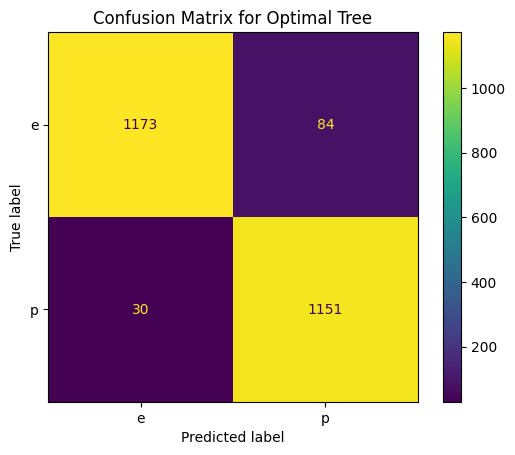


Classification Report:
              precision    recall  f1-score   support

           e       0.98      0.93      0.95      1257
           p       0.93      0.97      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [52]:
from sklearn.tree import export_text

def generate_fully_readable_rules(optimal_tree, feature_names, label_encoders, target_encoder):
    """
    Generate fully human-readable rules from the optimal tree.

    Args:
    - optimal_tree: Trained DecisionTreeClassifier.
    - feature_names: List of feature names.
    - label_encoders: Dictionary of LabelEncoder objects for features.
    - target_encoder: LabelEncoder object for the target variable.

    Returns:
    - Fully human-readable rules as a string.
    """
    tree_rules = export_text(optimal_tree, feature_names=feature_names)
    readable_rules = []

    for line in tree_rules.split('\n'):
        if 'class:' in line:
            # Decode the class value to human-readable labels
            class_label = int(line.split(':')[-1].strip())
            original_label = target_encoder.inverse_transform([class_label])[0]
            readable_class = "Edible" if original_label == "e" else "Poisonous"
            line = line.replace(f'class: {class_label}', f'class: "{readable_class}"')
        else:
            for feature in feature_names:
                if feature in line:
                    # Translate feature thresholds to categorical labels
                    parts = line.split()
                    if len(parts) >= 3 and parts[-2] in ('<=', '>'):
                        encoded_threshold = float(parts[-1])
                        feature_name = feature.strip()
                        if feature_name in label_encoders:  # Check if an encoder exists for this feature
                            if encoded_threshold.is_integer():
                                # Decode the threshold to its original categorical label
                                original_threshold = label_encoders[feature_name].inverse_transform([int(encoded_threshold)])[0]
                                line = line.replace(str(int(encoded_threshold)), f'"{original_threshold}"')

        readable_rules.append(line)

    # Combine the rules into a single string
    final_rules = "\n".join(readable_rules)
    print("\nFully Human-Readable Rules from the Optimal Tree:")
    print(final_rules)
    return final_rules

# Example Usage
# Load the dataset
df = pd.read_csv("/content/mushrooms.csv")

# Encode the dataset
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])  # Encode target variable (e.g., "e" -> 0, "p" -> 1)

label_encoders = {}
for column in df.drop(columns=['class']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Generate human-readable rules
readable_rules = generate_fully_readable_rules(
    optimal_tree=optimal_tree,
    feature_names=X_train.columns,
    label_encoders=label_encoders,
    target_encoder=labelencoder
)


y_pred = optimal_tree.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix for Optimal Tree")
plt.show()

# Classification report for detailed performance metrics
report = classification_report(y_test, y_pred, target_names=labelencoder.classes_)
print("\nClassification Report:")
print(report)

##Explaining Code and Results




---

#### **Key Steps**

##### **1. Translating Decision Tree Rules**
- **Purpose:**
  - Convert the decision tree's internal representation into human-readable rules.
  - Ensure that encoded feature splits and class predictions are mapped back to their original categorical labels.

- **How It Works:**
  - Class predictions (`e` for `Edible`, `p` for `Poisonous`) are decoded and presented as `"Edible"` and `"Poisonous"`.

---

##### **2. Generating the Confusion Matrix**
- **Purpose:**
  - Compare the model's predicted classes against the actual labels to assess performance.
- **Why It’s Useful:**
  - Shows how many samples are correctly and incorrectly classified for each class.
  - Helps identify any biases or performance issues in class predictions.

---

##### **3. Classification Report**
- **Metrics:**
  - **Precision:** Fraction of correct predictions among all predicted instances of a class.
  - **Recall:** Fraction of actual instances of a class that are correctly identified.
  - **F1-Score:** Balances precision and recall for a more comprehensive evaluation.
  - **Accuracy:** Overall percentage of correct predictions.

- **Why It’s Useful:**
  - Provides detailed performance metrics for each class, helping evaluate class-specific strengths and weaknesses.

---

#### **Why This Approach is Valuable**
- **Interpretability:**
  - Translated rules ensure transparency in the decision-making process.
  - Stakeholders can easily understand the conditions under which predictions are made.
- **Performance Validation:**
  - The confusion matrix and classification report comprehensively evaluate the tree's accuracy and generalization ability.

---

### **Conclusion**
This process ensures that the decision tree's predictions are not only accurate but also interpretable.


### Tree Visualization

#### **Objective**

The purpose of this process is to create a graphical representation of the decision tree, highlighting its splits, feature importance, and class probabilities in an interpretable format.

In [53]:
from sklearn.tree import export_graphviz
import graphviz

def visualize_tree(optimal_tree, feature_names, class_names, output_file="tree"):
    """
    Visualize the decision tree using graphviz.

    Args:
    - optimal_tree: Trained DecisionTreeClassifier.
    - feature_names: List of feature names.
    - class_names: List of class names (e.g., ['Edible', 'Poisonous']).
    - output_file: Name of the output file for visualization.

    Returns:
    - Graphviz Source object to display the tree.
    """
    # Export the tree to DOT format
    dot_data = export_graphviz(
        optimal_tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,  # Fill nodes with colors based on class probabilities
        rounded=True,  # Rounded corners for better visualization
        special_characters=True  # Support for non-ASCII characters
    )

    # Render the tree using graphviz
    graph = graphviz.Source(dot_data)
    graph.render(output_file, format="png", cleanup=True)  # Save as PNG
    print(f"Decision tree visualization saved as {output_file}.png")
    return graph

# Example Usage
class_names = [labelencoder.inverse_transform([0])[0], labelencoder.inverse_transform([1])[0]]
graph = visualize_tree(
    optimal_tree=optimal_tree,
    feature_names=X_train.columns,
    class_names=class_names,
    output_file="optimal_tree"
)

# Display the tree inline (for Jupyter Notebook or Colab)
graph.view()


Decision tree visualization saved as optimal_tree.png


'optimal_tree.pdf'

###Explaining Code




#### **Key Steps**

#### **1. Exporting the Tree to DOT Format**
- **Purpose:**
  - The tree structure is exported to DOT format using the `export_graphviz` function from `sklearn.tree`.
  - This format provides a detailed textual representation of the tree, which is then rendered into a visual diagram.

- **Customization:**
  - **`feature_names`:** Displays the names of features used for splits.
  - **`class_names`:** Maps the numeric class labels to their original class names (e.g., `Edible`, `Poisonous`).
  - **`filled=True`:** Fills the nodes with colors based on class probabilities, improving visual clarity.
  - **`rounded=True`:** Adds rounded corners to the nodes for a cleaner look.
  - **`special_characters=True`:** Ensures support for non-ASCII characters.

---

#### **2. Rendering and Saving the Visualization**
- **Graphviz Rendering:**
  - The exported DOT data is rendered into a graphical format (e.g., PNG) using `graphviz.Source`.
  - The output is saved as an image file (e.g., `optimal_tree.png`) for easy sharing and analysis.

---

#### **3. Displaying the Tree Inline**
- **Interactive Visualization:**
  - In Jupyter Notebook or Google Colab, the tree can be displayed inline using the `.view()` method, enabling immediate inspection and analysis.

---

### **Why This Visualization is Important**
1. **Interpretable Insights:**
   - The graphical representation shows how the tree splits on features and the resulting class probabilities at each node.
   - Provides a clear understanding of the decision-making process.

2. **Feature Importance:**
   - Highlights the most significant features used for splitting, offering insights into which attributes are critical for predictions.

3. **Stakeholder Communication:**
   - The visualization is intuitive and can be shared with non-technical stakeholders, making the model's logic transparent and actionable.


---

### **Conclusion**
Visualizing the decision tree with Graphviz enhances interpretability by presenting the model's logic in a visually intuitive format. This approach not only aids in debugging and analysis but also helps in effectively communicating the results to stakeholders.


# Plotting Accuracy for optimal size and optimal purity


## **Objective**


This process evaluates how the accuracy of the decision tree model changes with:
1. **Purity Thresholds (`Purity`)**: Controls the minimum impurity reduction required for splits.
2. **Maximum Tree Depth (`Size`)**: Limits the number of levels in the decision tree.

The goal is to analyze the relationship between these parameters and model performance to understand their impact on generalization and overfitting.

---

##Code

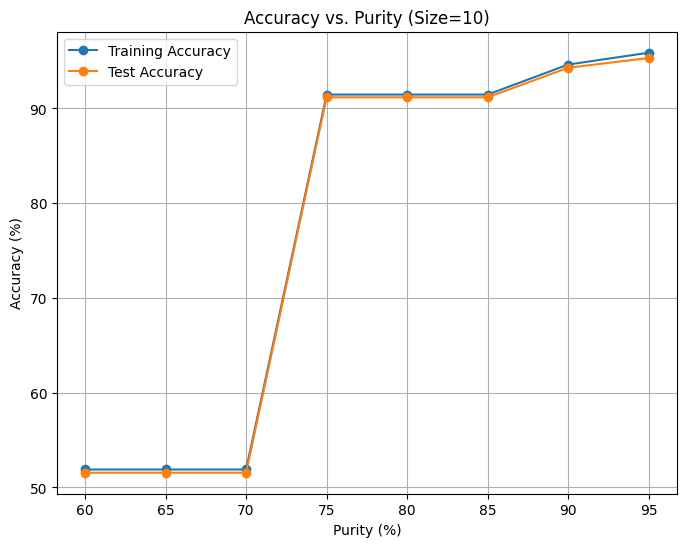

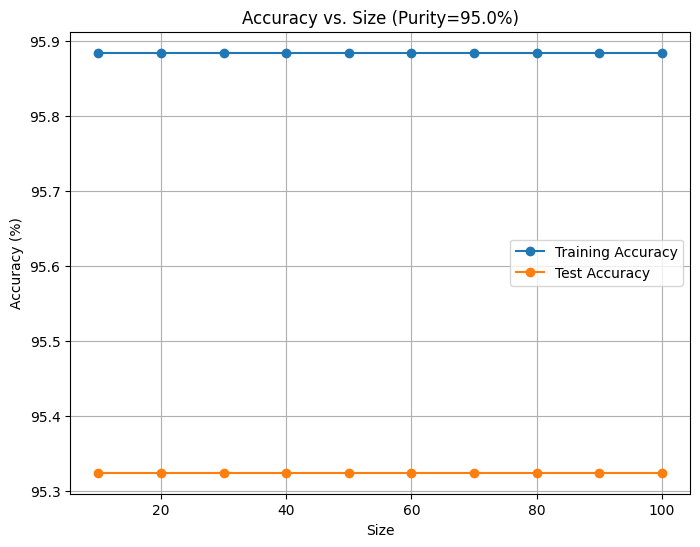

In [54]:
def plot_accuracy_curves(results_df, optimal_size, optimal_purity):
    # Filter by optimal size
    df_size = results_df[results_df['size'] == optimal_size]
    plt.figure(figsize=(8, 6))
    plt.plot(df_size['purity'], df_size['training-accuracy'], label='Training Accuracy', marker='o')
    plt.plot(df_size['purity'], df_size['test-accuracy'], label='Test Accuracy', marker='o')
    plt.xlabel('Purity (%)')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy vs. Purity (Size={optimal_size})')
    plt.legend()
    plt.grid()
    plt.show()

    # Filter by optimal purity
    df_purity = results_df[results_df['purity'] == optimal_purity]
    plt.figure(figsize=(8, 6))
    plt.plot(df_purity['size'], df_purity['training-accuracy'], label='Training Accuracy', marker='o')
    plt.plot(df_purity['size'], df_purity['test-accuracy'], label='Test Accuracy', marker='o')
    plt.xlabel('Size')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy vs. Size (Purity={optimal_purity}%)')
    plt.legend()
    plt.grid()
    plt.show()

plot_accuracy_curves(results_df, optimal_size, optimal_purity)

##Explanation of Code and Result




### **Graphs and Observations**

#### **1. Accuracy vs. Purity (Size = 10)**
- **Graph:**
  - X-Axis: Purity thresholds (%).
  - Y-Axis: Accuracy (training and test).
  - Represents accuracy trends for different purity thresholds while keeping the tree depth constant at `Size=10`.

- **Key Insights:**
  1. **Low Purity Thresholds (`60% - 70%`):**
     - **Train Accuracy:** ~51.9%.
     - **Test Accuracy:** ~51.56%.
     - Indicates that the tree is splitting too frequently on noise, resulting in poor generalization and underperformance.

  2. **Transition Zone (`75%`):**
     - **Train Accuracy:** Jumps to ~91.47%.
     - **Test Accuracy:** Jumps to ~91.18%.
     - Splits are now based on meaningful impurity reductions, improving both training and test accuracy.

  3. **High Purity Thresholds (`80% - 95%`):**
     - **Train Accuracy:** Gradually improves to ~95.88%.
     - **Test Accuracy:** Stabilizes at ~95.32%.
     - Higher purity thresholds enforce stricter splits, avoiding overfitting while maintaining excellent generalization.

---

#### **2. Accuracy vs. Size (Purity = 95%)**
- **Graph:**
  - X-Axis: Tree Depth (`Size`).
  - Y-Axis: Accuracy (training and test).
  - Represents accuracy trends for different tree depths while keeping the purity threshold constant at `95%`.

- **Key Insights:**
  1. **Consistency Across Depths:**
     - **Train Accuracy:** ~95.88% across all depths.
     - **Test Accuracy:** ~95.32% across all depths.
     - Indicates that the `min_impurity_decrease` parameter is effectively regularizing the tree, preventing unnecessary splits regardless of tree depth.

  2. **Why No Overfitting?**
     - The high purity threshold (`95%`) ensures splits only occur for significant reductions in impurity, limiting the model's ability to overfit even with larger tree depths.

---

### **Overall Interpretations**

#### **Purity Thresholds:**
- **Low Purity:** Results in frequent, less meaningful splits, leading to overfitting on the training data and poor test performance.
- **High Purity:** Enforces stricter splits, improving generalization and test accuracy while maintaining high training accuracy.

#### **Tree Depth:**
- Increasing the depth beyond a certain point has no effect due to the regularization enforced by `min_impurity_decrease`.
- Optimal tree size (`Size=10`) is sufficient to capture meaningful patterns while avoiding overfitting.

---

### **Conclusion**
1. **Purity vs. Accuracy:**
   - The transition at `Purity=75%` highlights the importance of setting a meaningful threshold for impurity reduction.
   - High purity values (e.g., `95%`) ensure excellent generalization.

2. **Size vs. Accuracy:**
   - The model remains stable across depths when regularized by a high purity threshold, demonstrating robustness.

These results confirm that the combination of `Size=10` and `Purity=95%` is optimal for achieving high accuracy and generalization.
